In [1]:
import pandas as pd
import numpy as np
import re
import string
from datetime import datetime
from datetime import date

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Search hack on dataframes
### How to use: find(data,"movie_id","equal","tt6723088")

<h3>Search functions available</h3>

<ol>
  <li>Equal</li>
  <li>Not Equal</li>
  <li>Lessser than</li>
  <li>Greater than</li>
  <li>Null</li>    
  <li>Not null</li>
  <li>Contains</li>
  <li>Not contains</li>
  <li>Duplicate</li>
  <li>Index</li>
  <li>Unique Value</li>
  <li>Unique Count</li>
</ol> 

In [2]:
# Useful Search hack for any value in a column


def find(dataFrame,columnName,operation,searchElement):
    operation = operation.lower().translate(str.maketrans('', '', string.whitespace))
    if operation == "equal": 
        return dataFrame.loc[dataFrame[columnName] == searchElement]
    elif operation == "notequal":
        return dataFrame.loc[dataFrame[columnName] != searchElement]
    elif operation == "lesserthan":
        return dataFrame.loc[dataFrame[columnName] < searchElement]
    elif operation == "greaterthan": 
        return dataFrame.loc[dataFrame[columnName] > searchElement]
    elif operation == "null":
        return dataFrame.loc[dataFrame[columnName].isna()] 
    elif operation == "notnull":
        dataFrame.loc[dataFrame[columnName].notnull()]
    elif operation == "contains":
        return dataFrame[dataFrame[columnName].str.contains(searchElement)]
    elif operation == "notcontains":
        return dataFrame[~dataFrame[columnName].str.contains(searchElement)]   
    elif operation == "duplicate":
        return dataFrame[dataFrame.duplicated([columnName])].sort_values(by=[columnName])
    elif operation == "index":
        return dataFrame.index[dataFrame[columnName] == searchElement].tolist()
    elif operation == "uniquevalue":
        return dataFrame[columnName].unique()
    elif operation == "uniquecount":
        return dataFrame[columnName].nunique()
    else:
        print("The operations you can use are listed above! \n")

###  Read data from file path

In [3]:
# fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-17-2019.csv'
fileLocation = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Data\\IMDb\\stage3FinalProcessedDF_Feb-26-2020.csv'
saveFileToPath = "C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Data\\IMDb"

data = pd.read_csv(fileLocation)



## Data processing - Fill 0 for missing year and N

In [4]:
# Reset the missing years in birth and death year of director to 0
data.loc[(data['deathYear'].str.contains('N',na=False) | data['deathYear'].isna()), 'deathYear'] = 0
data.loc[(data['birthYear'].str.contains('N',na=False) | data['birthYear'].isna() ), 'birthYear'] = 0
# data.loc[data['deathYear'].isna(), 'deathYear'] = 0
# data.loc[data['birthYear'].isna(), 'birthYear'] = 0

## Functions to save data to file with dataframe name.

In [5]:
# Helper method for save_to_file

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [6]:
# Function: Save Dataframe to CSV

def save_to_file(dataFrame, folderPath):
    today = date.today()
    todayDate = today.strftime("%b-%d-%Y")
#     dataFrame.to_csv(folderPath+ '\\' + get_df_name(dataFrame) + '_' + todayDate  + '.csv',index=False, encoding="utf8" )
    dataFrame.to_csv(folderPath+ '\\' + get_df_name(dataFrame) + '_' + todayDate  + '.csv',index=False, encoding="utf-8-sig" )

In [7]:
data.director_ids.nunique()

145328

In [8]:
find(data,"movie_id","uniquecount",0)

566575

In [9]:
data.Gender.value_counts()

Male      497044
Female    122449
Name: Gender, dtype: int64

In [10]:
data.head()

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male


## Procure the first movie year and career year number of each movie

In [11]:
# Dataframe to group the directors and find the minimum movie year which indicates the Career Start year
directorsCareerStartYearDF = data.loc[data.groupby('director_ids')['movie_year'].idxmin()][['movie_year','director_ids']]

# Rename the column Movie Year to CareerStartYear
directorsCareerStartYearDF = directorsCareerStartYearDF.rename(columns={'movie_year':'CareerStartYear'})
directorsCareerStartYearDF

In [12]:
# Merge the Directors Career Start Year with the original data set
withFirstMovieYearDF = data.merge(directorsCareerStartYearDF, on='director_ids',how = 'left')

# Generate a column with Career Year number. i.e - Movie year - Career Start Year + 1
withFirstMovieYearDF["Career_Year_Number"] = withFirstMovieYearDF.movie_year - withFirstMovieYearDF.CareerStartYear + 1

In [13]:
withFirstMovieYearDF

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,17 October 1894 (UK) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male,1890,5
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,9 January 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,9 October 1894 (USA) See more »,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male,1894,1


## Alternative solution to procure the first movie year and career year number of each movie

### Begin

In [14]:
# # Sort ascending by movie_year to find the first movie produced year of each director

# sortAscendingDF = data.sort_values(by='movie_year',ascending = True)
# AscendingWithoutDuplicatesDP = sortAscendingDF.drop_duplicates(subset= 'director_ids',keep='first')

# # Store Career Start year of each director. Fetch the columns required for merge

# fetchFirstMovieYearDF = AscendingWithoutDuplicatesDP[['movie_year','director_ids']]
# fetchFirstMovieYearDF = fetchFirstMovieYearDF.rename(columns={'movie_year':'CareerStartYear'})

# withFirstMovieYearDF = data.merge(fetchFirstMovieYearDF, on='director_ids',how = 'left')
# #withFirstMovieYearDF["Career_Year_Number"] = withFirstMovieYearDF.movie_year - withFirstMovieYearDF.CareerStartYear + 1
# withFirstMovieYearDF["Career_Year_Number"] = withFirstMovieYearDF.movie_year - withFirstMovieYearDF.CareerStartYear

### End

In [15]:
withFirstMovieYearDF.nunique()

director_ids           145328
director_names         142535
movie_id               566575
title                  564051
review_count_user        1044
review_count_critic       538
metascore                 101
rating_value               92
rating_count            13827
date_published          33828
release_date           175667
movie_year                132
birthYear                 164
deathYear                 114
primaryProfession        4231
knownForTitles         143214
Gender                      2
CareerStartYear           130
Career_Year_Number         89
dtype: int64

In [17]:
# Convert into int years before using for calculations

withFirstMovieYearDF.movie_year = withFirstMovieYearDF.movie_year.astype(int)
withFirstMovieYearDF.deathYear = withFirstMovieYearDF.deathYear.astype(int)
withFirstMovieYearDF.birthYear = withFirstMovieYearDF.birthYear.astype(int)

In [18]:
# Posthumous Recoginition
# The records which we believe contain Posthumous data. i.e. movies released after n years of directors death
years_after_death = 2
dropIncorrectlyRecordedYears = withFirstMovieYearDF.loc[(withFirstMovieYearDF.movie_year - withFirstMovieYearDF.deathYear >= years_after_death) & (withFirstMovieYearDF.deathYear !=0)]
dropIncorrectlyRecordedYears

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number
18652,nm0883920,Travers Vale,tt0037732,Gaslight Follies (1945) - IMDb,1,None,None,5.2,12,1945-09-28,28 September 1945 (USA) See more »,1945,1865,1927,"director,writer,producer","tt0008557,tt0013483,tt0002901,tt0007426",Male,1917,29
21169,nm0000248,Edward D. Wood Jr.,tt0040844,Crossroads of Laredo (1995) - IMDb,4,2,None,3.8,151,2008-12-17,None,1995,1924,1978,"writer,director,actor","tt0045826,tt0047127,tt0067479,tt0052077",Male,1951,45
22580,nm1340117,Salvador Toscano,tt0042726,Memorias de un mexicano (1950) - IMDb,1,None,None,8.4,34,1950-08-24,24 August 1950 (Mexico) See more »,1950,1872,1947,"director,cinematographer,producer","tt0384893,tt0391023,tt0042726,tt0387871",Male,1950,1
23213,nm0000428,D.W. Griffith,tt0043551,Footlight Varieties (1951) - IMDb,1,None,None,5.6,21,2003-03-14,None,1951,1875,1948,"director,writer,producer","tt0004972,tt0006864,tt0010484,tt0014604",Male,1908,44
27845,nm0172485,Lewis D. Collins,tt0049390,Jungle Safari (1956) - IMDb,None,None,None,5.5,6,None,None,1956,1899,1954,"director,writer,assistant_director","tt0037114,tt0025895,tt0037904,tt0030664",Male,1930,27
27846,nm0853028,Ray Taylor,tt0049390,Jungle Safari (1956) - IMDb,None,None,None,5.5,6,None,None,1956,1888,1952,"director,assistant_director,producer","tt0032475,tt0031394,tt0022811,tt0020272",Female,1927,30
29782,nm0001178,Sergei M. Eisenstein,tt0051790,Rettegett Iván 2. (1958) - IMDb,34,28,None,7.7,5234,1958-09-01,1 September 1958 (Soviet Union) See more »,1958,1898,1948,"director,writer,editor","tt0079020,tt0037824,tt0029850,tt0015648",Male,1923,36
29906,nm0105175,Fred C. Brannon,tt0051935,Missile Monsters (1958) - IMDb,1,1,None,4.7,22,2013-08-15,None,1958,1901,1953,"director,art_department","tt0038435,tt0041547,tt0042600,tt0042873",Female,1945,14
30091,nm0105175,Fred C. Brannon,tt0052160,Satan's Satellites (1958) - IMDb,1,5,None,5.2,49,2013-08-17,None,1958,1901,1953,"director,art_department","tt0038435,tt0041547,tt0042600,tt0042873",Female,1945,14
30625,nm0105175,Fred C. Brannon,tt0052845,Ghost of Zorro (1959) - IMDb,2,None,None,6.3,25,1959-06-30,30 June 1959 (USA) See more »,1959,1901,1953,"director,art_department","tt0038435,tt0041547,tt0042600,tt0042873",Female,1945,15


In [19]:
# Drop all values containing movies released after n years as per the above assumption

withFirstMovieYearDF.drop(dropIncorrectlyRecordedYears.index, inplace= True)

In [20]:
withFirstMovieYearDF

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,17 October 1894 (UK) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male,1890,5
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,9 January 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,9 October 1894 (USA) See more »,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male,1894,1


In [21]:
withFirstMovieYearDF.Career_Year_Number.value_counts()

1     169511
2      34322
3      32494
4      29846
5      27720
6      25243
7      24144
8      22816
9      21006
10     19977
11     18633
12     17118
13     15817
14     14877
15     13724
16     12703
17     11995
18     10766
19      9951
20      9227
21      8697
22      7598
23      7109
24      6158
25      5599
26      5046
27      4772
28      4339
29      3779
30      3418
       ...  
56        57
55        55
57        48
58        36
59        32
60        20
61        20
64         9
63         7
62         7
65         6
66         6
67         5
69         5
70         4
73         3
78         3
76         3
72         3
71         3
82         2
74         2
75         2
77         2
68         2
84         2
80         2
85         1
79         1
92         1
Name: Career_Year_Number, Length: 84, dtype: int64

## Number of movies released along the Career Year Number

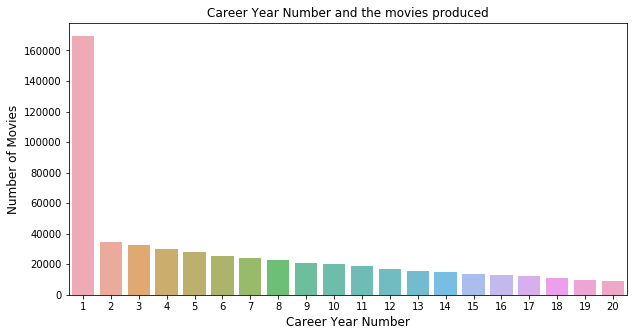

In [22]:
# Plotting a bar graph of the number of movies released in each Career Year Number, for the first 20 Career years listed

career_year_count  = withFirstMovieYearDF['Career_Year_Number'].value_counts()
career_year_count = career_year_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(career_year_count.index, career_year_count.values, alpha=0.8)
plt.title('Career Year Number and the movies produced')
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Career Year Number', fontsize=12)
plt.show()

# Cleaned the data for Pivot operations

In [23]:
# Act as a counter for pivot table calculations

withFirstMovieYearDF['Dummy'] = 1

In [24]:
withFirstMovieYearDF.head()

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number,Dummy
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5,1
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1,1
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1,1
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1,1
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4,1


In [25]:
malePivotData = withFirstMovieYearDF.loc[withFirstMovieYearDF['Gender'] == 'Male']
malePivotData.nunique()

director_ids           108505
director_names         106080
movie_id               464677
title                  463102
review_count_user         995
review_count_critic       524
metascore                 101
rating_value               92
rating_count            12616
date_published          33250
release_date           157115
movie_year                131
birthYear                 163
deathYear                 114
primaryProfession        3579
knownForTitles         107083
Gender                      1
CareerStartYear           129
Career_Year_Number         84
Dummy                       1
dtype: int64

In [26]:
femalePivotData = withFirstMovieYearDF.loc[withFirstMovieYearDF['Gender'] == 'Female']
femalePivotData.nunique()

director_ids            36793
director_names          36422
movie_id               118653
title                  118397
review_count_user         491
review_count_critic       324
metascore                  92
rating_value               92
rating_count             4669
date_published          20254
release_date            61270
movie_year                124
birthYear                 140
deathYear                  98
primaryProfession        2412
knownForTitles          36416
Gender                      1
CareerStartYear           118
Career_Year_Number         63
Dummy                       1
dtype: int64

In [59]:
withFirstMovieYearDF.nunique()

director_ids           144823
director_names         142048
movie_id               562870
title                  560380
review_count_user        1044
review_count_critic       538
metascore                 101
rating_value               91
rating_count            13826
date_published          33796
release_date           174835
movie_year                131
birthYear                 163
deathYear                 114
primaryProfession        4226
knownForTitles         142724
Gender                      2
CareerStartYear           129
Career_Year_Number         84
Dummy                       1
dtype: int64

In [27]:
# Reseting the pivot table index so we can have directorID and Gender as column and rotate

malePivotTable = pd.pivot_table(malePivotData, values='Dummy', index=['director_ids'],
                                columns=['Career_Year_Number',], aggfunc=np.sum)

In [28]:
malePivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,75,76,77,78,79,80,82,84,85,92
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000019,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000032,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000033,1.0,NaN,3.0,3.0,4.0,2.0,3.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Reseting the pivot table index so we can have directorID and Gender as column and rotate

femalePivotTable = pd.pivot_table(femalePivotData, values='Dummy', index=['director_ids'],
                                  columns=['Career_Year_Number'], aggfunc=np.sum)

In [30]:
overallPivotTable = pd.pivot_table(withFirstMovieYearDF, values='Dummy', index=['director_ids'],
                                   columns=['Career_Year_Number'], aggfunc=np.sum)

In [112]:
femalePivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,54,55,56,57,59,60,61,64,65,71
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000037,1.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000069,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000096,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000098,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000099,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000113,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000130,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000155,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000159,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
malePivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,75,76,77,78,79,80,82,84,85,92
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000019,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000032,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000033,1.0,NaN,3.0,3.0,4.0,2.0,3.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
overallPivotTable.head()

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,75,76,77,78,79,80,82,84,85,92
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Trial - director specific data

In [34]:
withFirstMovieYearDF.head()

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number,Dummy
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5,1
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1,1
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1,1
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1,1
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4,1


In [35]:
# # Convert rating_value into float before using for aggregation
# WithFirstMovieYearDF.rating_value = WithFirstMovieYearDF.rating_value.astype(float)


In [36]:
dropRatingLessRecords = withFirstMovieYearDF.loc[withFirstMovieYearDF['rating_value'] == 'None']
len(dropRatingLessRecords)

3925

In [37]:
# Drop all values containing incorrect recorded years as per the above assumption
print("Before dropping records : ",len(withFirstMovieYearDF))
withFirstMovieYearDF.drop(dropRatingLessRecords.index, inplace= True)
print("After dropping records : ",len(withFirstMovieYearDF))

Before dropping records :  619262
After dropping records :  615337


# Number of movies produced by each director

In [38]:
withFirstMovieYearDF.rating_value = withFirstMovieYearDF.rating_value.astype(float)
withFirstMovieYearDF.rating_count = withFirstMovieYearDF.rating_count.astype(int)

In [83]:
#withFirstMovieYearDF.groupby('director_ids')['director_names']

In [73]:
def roundOfMean(x):
    return round(np.mean(x),2)

In [93]:
# groupByAggregationDirector = {
#     'movies_produced': ('movie_id','count'),
#     'Average_rating_value': ('rating_value',roundOfMean),
#     'Average_rating_count': ('rating_count',roundOfMean),
#     'career_Length': ('Career_Year_Number','max')
# }

# groupByListDirectors = ['director_ids','birthYear','deathYear','primaryProfession','knownForTitles','Gender']

In [108]:
groupByListDirectors = ['director_ids']
directorDataDF = withFirstMovieYearDF.groupby(groupByListDirectors) \
                .agg({'movie_id':'count', 'rating_value':roundOfMean,'rating_count':roundOfMean,'Career_Year_Number':'max'}) \
                .reset_index()
directorDataDF = directorDataDF.rename(columns={'movie_id':'movies_produced','rating_value':'Average_rating_value', \
                                                'rating_count':'Average_rating_count','Career_Year_Number':'career_Length'})
directorDataDF

,director_ids,movies_produced,Average_rating_value,Average_rating_count,career_Length
0,nm0000005,70,7.36,6984.76,63
1,nm0000008,1,7.20,7002.00,1
2,nm0000009,1,5.70,676.00,1
3,nm0000010,1,5.80,162.00,1
4,nm0000018,2,5.85,722.50,3
5,nm0000019,26,7.31,12213.92,40
6,nm0000024,1,7.50,320.00,1
7,nm0000032,3,6.57,605.67,17
8,nm0000033,78,7.15,31773.71,52
9,nm0000036,39,7.17,4414.18,49


In [109]:
directorDataDF = withFirstMovieYearDF.merge(directorDataDF, on='director_ids',how = 'left') \
                                     .sort_values(by='director_ids',ascending=True) \
                                     .drop_duplicates(subset='director_ids') \
                                     .reset_index(drop=True)

In [110]:
directorDataDF

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,...,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number,Dummy,movies_produced,Average_rating_value,Average_rating_count,career_Length
0,nm0000005,Ingmar Bergman,tt0090222,De två saliga (TV Movie 1986) - IMDb,2,1,None,6.3,121,1986-02-19,...,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0050976",Male,1946,41,1,70,7.36,6984.76,63
1,nm0000008,Marlon Brando,tt0055257,One-Eyed Jacks (1961) - IMDb,89,38,None,7.2,7002,1961-07-08,...,"actor,soundtrack,director","tt0047296,tt0078788,tt0070849,tt0068646",Male,1961,1,1,1,7.20,7002.00,1
2,nm0000009,Richard Burton,tt0062898,Doctor Faustus (1967) - IMDb,27,8,None,5.7,676,1967-10-10,...,"actor,producer,soundtrack","tt0061184,tt0057877,tt0059749,tt0087803",Male,1967,1,1,1,5.70,676.00,1
3,nm0000010,James Cagney,tt0050964,À deux pas de l'enfer (1957) - IMDb,13,2,None,5.8,162,1958-10-10,...,"actor,soundtrack,director","tt0055256,tt0035575,tt0029870,tt0031867",Male,1957,1,1,1,5.80,162.00,1
4,nm0000018,Kirk Douglas,tt0070642,Scalawag (1973) - IMDb,4,5,None,5.1,212,1973-12-04,...,"actor,producer,soundtrack","tt0054331,tt0052365,tt0080736,tt0049456",Male,1973,1,1,2,5.85,722.50,3
5,nm0000019,Federico Fellini,tt0055805,Boccaccio 70 (1962) - IMDb,19,43,None,7.2,2751,1963-12-26,...,"writer,director,assistant_director","tt0047528,tt0056801,tt0071129,tt0053779",Male,1951,12,1,26,7.31,12213.92,40
6,nm0000024,John Gielgud,tt0058175,Hamlet (1964) - IMDb,15,4,None,7.5,320,1964-09-23,...,"actor,writer,director","tt0082031,tt0117631,tt0071877,tt0045943",Male,1964,1,1,1,7.50,320.00,1
7,nm0000032,Charlton Heston,tt0084359,Mother Lode (1982) - IMDb,20,7,None,6.3,867,1982-09-23,...,"actor,director,writer","tt0070723,tt0063442,tt0052618,tt0049833",Male,1972,11,1,3,6.57,605.67,17
8,nm0000033,Alfred Hitchcock,tt0394918,"""Startime"" Incident at a Corner (TV Episode 19...",1critic,None,None,7.3,88,1960-04-05,...,"actor,director,producer","tt0052357,tt0053125,tt0054215,tt0056869",Male,1925,36,1,78,7.15,31773.71,52
9,nm0000036,Buster Keaton,tt0016630,Battling Butler (1926) - IMDb,19,21,None,7.2,1806,1926-09-19,...,"actor,writer,director","tt0017925,tt0015863,tt0015324,tt0016332",Male,1917,10,1,39,7.17,4414.18,49


In [113]:
directorDataDF['movie_id'].describe()

count        144823
unique       134849
top       tt6243606
freq              7
Name: movie_id, dtype: object

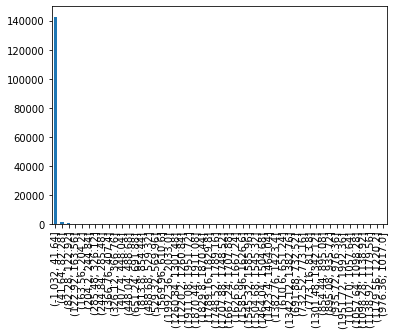

In [115]:
pd.cut(directorDataDF['movies_produced'], bins=50).value_counts().plot(kind="bar")

In [ ]:
save_to_file(directorDataDF,saveFileToPath)

# Without Rating value Data frame

In [117]:
withoutRatingValueDF = withFirstMovieYearDF.loc[withFirstMovieYearDF['rating_value'] == 'None']
#withoutRatingValueDF['rating_value'] = withoutRatingValueDF['rating_value'].replace('None',0)

C:\Users\yuvar\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [118]:
withoutRatingValueDF

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number,Dummy


In [ ]:
withoutRatingValueDF.nunique()

In [ ]:
# countDirectorsAndMovies = WithFirstMovieYearDF.groupby('director_ids').agg({'movie_id':'count'}).reset_index()

aggNoneDF = withoutRatingValueDF.groupby('movie_year').agg({'rating_value':'count'}).reset_index().rename(columns={'rating_value':'NoneCount'})
aggNoneDF

In [ ]:
ax25 = aggNoneDF.plot.scatter(x='movie_year',
                      y='NoneCount',
                      c='DarkBlue')

In [ ]:
# Metascore data is available 
print(" Records without metascore value : ",len(withFirstMovieYearDF.loc[withFirstMovieYearDF['metascore'] == 'None']))

# Capture career length

In [119]:
#overallPivotTable = saef.copy()
saef = overallPivotTable.copy()

In [120]:
# # Reverse the columns to search from the last career year number
# overallPivotTable = overallPivotTable[overallPivotTable.columns[::-1]]

In [121]:
# Function to find the column name of the last non null value. This is our career length of every director

def columnNameOfFirstNonNullValue(x):
    if x.last_valid_index() is None:
        return None
    else:
        return x.last_valid_index()

In [122]:
career_length_overall = overallPivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_male = malePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_female = femalePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')

In [123]:
career_length_overall
#career_length_male
#career_length_female

director_ids
nm0000005    63
nm0000008     1
nm0000009     1
nm0000010     1
nm0000018     3
nm0000019    40
nm0000024     1
nm0000032    17
nm0000033    52
nm0000036    49
nm0000037    28
nm0000040    49
nm0000041    53
nm0000044    21
nm0000045     1
nm0000048     1
nm0000050     1
nm0000056    20
nm0000057     1
nm0000059    33
nm0000063     1
nm0000069     9
nm0000071     1
nm0000076    29
nm0000078    17
nm0000080    52
nm0000083    23
nm0000086     1
nm0000088    32
nm0000090     1
             ..
nm8959262     1
nm8963732     1
nm8970382     1
nm8985204     5
nm8988355     1
nm8999744     1
nm9000326     1
nm9007678     1
nm9009028     1
nm9013682     1
nm9023517     5
nm9026707     1
nm9036921     1
nm9036922     1
nm9044404     1
nm9082106     1
nm9093949     1
nm9122531     1
nm9128238     1
nm9129783     1
nm9129851     1
nm9131638     1
nm9136793     1
nm9140397     1
nm9141900     1
nm9154996     1
nm9156495     1
nm9161613     1
nm9182259     1
nm9196080     1
Length: 145

In [124]:
# Verify
#career_length_overall['nm0210701']
career_length_overall['nm0000080']


52

In [125]:
#overallPivotTable[overallPivotTable.notnull()].to_csv('csv.csv')
#nm0210701


In [126]:
overallPivotTable["career_length"] = career_length_overall.tolist()
malePivotTable["career_length"] = career_length_male.tolist()
femalePivotTable["career_length"] = career_length_female.tolist()

In [127]:
overallPivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,76,77,78,79,80,82,84,85,92,career_length
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
nm0000019,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
nm0000032,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
nm0000033,1.0,NaN,3.0,3.0,4.0,2.0,3.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52


In [128]:
directorCareerLengthDF = overallPivotTable[['career_length']]

In [129]:
directorCareerLengthDF.reset_index(inplace=True)

In [130]:
directorCareerLengthDF

Career_Year_Number,director_ids,career_length
0,nm0000005,63
1,nm0000008,1
2,nm0000009,1
3,nm0000010,1
4,nm0000018,3
5,nm0000019,40
6,nm0000024,1
7,nm0000032,17
8,nm0000033,52
9,nm0000036,49


In [132]:
masterMovieDF = withFirstMovieYearDF.merge(directorCareerLengthDF, on='director_ids',how = 'left')

In [133]:
masterMovieDF

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,...,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number,Dummy,career_length
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,...,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5,1,14
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,...,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1,1,5
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,...,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1,1,5
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,...,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,1,1,5
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,...,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4,1,14
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,...,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5,1,14
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,...,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5,1,14
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,...,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male,1890,5,1,14
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,...,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,5,1,14
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,...,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male,1894,1,1,1


In [135]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- Overall

m1 = overallPivotTable.columns[:-1].values <= overallPivotTable.career_length.values[:, None]
overallPivotTableFinal = overallPivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m1)

In [136]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- female

m2= femalePivotTable.columns[:-1].values <= femalePivotTable.career_length.values[:, None]
femalePivotTableFinal = femalePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m2)

In [137]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- male

m3 = malePivotTable.columns[:-1].values <= malePivotTable.career_length.values[:, None]
malePivotTableFinal = malePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m3)

In [138]:
overallPivotTableFinal

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,75,76,77,78,79,80,82,84,85,92
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000019,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000033,1.0,0.0,3.0,3.0,4.0,2.0,3.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
overallPivotTableFinal.count(axis=0)

Career_Year_Number
1     145294
2      59397
3      54285
4      49111
5      44328
6      39857
7      35929
8      32512
9      29382
10     26608
11     24074
12     21763
13     19735
14     17942
15     16267
16     14767
17     13472
18     12275
19     11190
20     10198
21      9232
22      8373
23      7634
24      6895
25      6311
26      5724
27      5180
28      4713
29      4252
30      3878
       ...  
55       115
56        92
57        81
58        68
59        52
60        41
61        33
62        24
63        21
64        18
65        15
66        13
67        10
68         9
69         8
70         7
71         7
72         6
73         6
74         4
75         4
76         4
77         3
78         3
79         2
80         2
82         2
84         2
85         2
92         1
Length: 84, dtype: int64

In [140]:
overallPivotTableFinal.sum(axis=0)

Career_Year_Number
1     169511.0
2      34322.0
3      32494.0
4      29846.0
5      27720.0
6      25243.0
7      24144.0
8      22816.0
9      21006.0
10     19977.0
11     18633.0
12     17118.0
13     15817.0
14     14877.0
15     13724.0
16     12703.0
17     11995.0
18     10766.0
19      9951.0
20      9227.0
21      8697.0
22      7598.0
23      7109.0
24      6158.0
25      5599.0
26      5046.0
27      4772.0
28      4339.0
29      3779.0
30      3418.0
        ...   
55        55.0
56        57.0
57        48.0
58        36.0
59        32.0
60        20.0
61        20.0
62         7.0
63         7.0
64         9.0
65         6.0
66         6.0
67         5.0
68         2.0
69         5.0
70         4.0
71         3.0
72         3.0
73         3.0
74         2.0
75         2.0
76         3.0
77         2.0
78         3.0
79         1.0
80         2.0
82         2.0
84         2.0
85         1.0
92         1.0
Length: 84, dtype: float64

In [144]:
overallPivotTableFinal.sum(axis=1)

director_ids
nm0000005    70.0
nm0000008     1.0
nm0000009     1.0
nm0000010     1.0
nm0000018     2.0
nm0000019    26.0
nm0000024     1.0
nm0000032     3.0
nm0000033    78.0
nm0000036    39.0
nm0000037    15.0
nm0000040    16.0
nm0000041    33.0
nm0000044     3.0
nm0000045     1.0
nm0000048     1.0
nm0000050     1.0
nm0000056     6.0
nm0000057     1.0
nm0000059     6.0
nm0000063     1.0
nm0000069     2.0
nm0000071     1.0
nm0000076    27.0
nm0000078     5.0
nm0000080    47.0
nm0000083    33.0
nm0000086     1.0
nm0000088    10.0
nm0000090     1.0
             ... 
nm8959262     1.0
nm8963732     1.0
nm8970382     1.0
nm8985204     3.0
nm8988355     1.0
nm8999744     1.0
nm9000326     1.0
nm9007678     2.0
nm9009028     1.0
nm9013682     1.0
nm9023517     2.0
nm9026707     4.0
nm9036921     1.0
nm9036922     1.0
nm9044404     1.0
nm9082106     2.0
nm9093949     1.0
nm9122531     1.0
nm9128238     1.0
nm9129783     1.0
nm9129851     1.0
nm9131638     1.0
nm9136793     1.0
nm9140397     1

# Maybe use this to calculate top 3 directors

In [153]:
femalePivotTableFinal

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,54,55,56,57,59,60,61,64,65,71
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000037,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000069,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000096,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000098,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000099,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000113,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000130,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000159,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# Maybe use this to calculate top 3 Female directors with highest movies
femalePivotTableFinal.sum(axis=0)

Career_Year_Number
1     41778.0
2      6864.0
3      6365.0
4      5975.0
5      5452.0
6      4998.0
7      4426.0
8      4161.0
9      3856.0
10     3634.0
11     3378.0
12     3060.0
13     2824.0
14     2555.0
15     2329.0
16     2154.0
17     2101.0
18     1842.0
19     1769.0
20     1547.0
21     1435.0
22     1189.0
23     1098.0
24      968.0
25      902.0
26      826.0
27      667.0
28      618.0
29      484.0
30      454.0
       ...   
34      197.0
35      204.0
36      192.0
37      155.0
38      151.0
39      141.0
40       94.0
41       81.0
42       89.0
43       55.0
44       56.0
45       39.0
46       39.0
47       28.0
48       22.0
49       15.0
50       17.0
51        6.0
52       15.0
53       13.0
54        7.0
55        6.0
56        5.0
57        8.0
59        2.0
60        1.0
61        5.0
64        2.0
65        1.0
71        1.0
Length: 63, dtype: float64

In [157]:
# Count non null values in rows
femalePivotTableFinal.count(axis=0)

Career_Year_Number
1     36793
2     13500
3     12287
4     11018
5      9813
6      8732
7      7751
8      6920
9      6180
10     5552
11     4982
12     4450
13     3967
14     3548
15     3161
16     2819
17     2535
18     2271
19     2040
20     1824
21     1625
22     1458
23     1319
24     1173
25     1069
26      963
27      859
28      786
29      703
30      633
      ...  
34      382
35      354
36      303
37      259
38      225
39      205
40      175
41      158
42      140
43      121
44      108
45       93
46       78
47       60
48       47
49       38
50       31
51       26
52       25
53       23
54       18
55       15
56       12
57       11
59        7
60        7
61        6
64        3
65        2
71        1
Length: 63, dtype: int64

In [143]:
overallPivotTableFinal.shape[0]
#femalePivotTableFinal.shape[0]
#malePivotTableFinal.shape[0]

145294

In [164]:
# # Divide by overall gender directors ( dividing by shape )

# female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.shape[0]
# male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.shape[0]
# overall_avg_movie_per_year = overallPivotTable.sum(axis=0) / overallPivotTable.shape[0]

# # Divide by overall directors  ( dividing by shape )

# female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / overallPivotTable.shape[0]
# male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / overallPivotTable.shape[0]
# overall_avg_movie_per_year = overallPivotTable.sum(axis=0) / overallPivotTable.shape[0]

# Divide by values with respect to each directors career length ( dividing by count, this neglects the NA in the column ) axis 0 is rows

female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.count(axis=0)
male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.count(axis=0)
overall_avg_movie_per_year = overallPivotTableFinal.sum(axis=0) / overallPivotTableFinal.count(axis=0)


In [162]:
female_avg_movie_per_year

Career_Year_Number
1     1.135488
2     0.508444
3     0.518027
4     0.542294
5     0.555590
6     0.572377
7     0.571023
8     0.601301
9     0.623948
10    0.654539
11    0.678041
12    0.687640
13    0.711873
14    0.720124
15    0.736792
16    0.764101
17    0.828797
18    0.811096
19    0.867157
20    0.848136
21    0.883077
22    0.815501
23    0.832449
24    0.825234
25    0.843779
26    0.857736
27    0.776484
28    0.786260
29    0.688478
30    0.717220
        ...   
34    0.515707
35    0.576271
36    0.633663
37    0.598456
38    0.671111
39    0.687805
40    0.537143
41    0.512658
42    0.635714
43    0.454545
44    0.518519
45    0.419355
46    0.500000
47    0.466667
48    0.468085
49    0.394737
50    0.548387
51    0.230769
52    0.600000
53    0.565217
54    0.388889
55    0.400000
56    0.416667
57    0.727273
59    0.285714
60    0.142857
61    0.833333
64    0.666667
65    0.500000
71    1.000000
Length: 63, dtype: float64

In [ ]:
overall_avg_movie_per_year
#male_avg_movie_per_year
#female_avg_movie_per_year

# Plotting the values

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.pyplot
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


In [ ]:
femaleAvgDF = female_avg_movie_per_year.to_frame()
femaleAvgDF = femaleAvgDF.reset_index(inplace= False)
femaleAvgDF.columns = ['Career_Year_Number', 'Average']

In [ ]:
maleAvgDF = male_avg_movie_per_year.to_frame()
maleAvgDF = maleAvgDF.reset_index(inplace= False)
maleAvgDF.columns = ['Career_Year_Number', 'Average']

In [ ]:
overallAvgDF = overall_avg_movie_per_year.to_frame()
overallAvgDF = overallAvgDF.reset_index(inplace= False)
overallAvgDF.columns = ['Career_Year_Number', 'Average']

In [ ]:
overallAvgDF
#femaleAvgDF
#maleAvgDF

In [ ]:
# Testing Draw Plot - Version 1

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    #plt.axis([0, 100, 0, 2.5])
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()  
    
    
    
    

In [ ]:
# # Testing Draw Plot - Version 1

# def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     #ax = plt.subplots(figsize=(15,6))
#     ax = df.plot(color='red', grid=True, label="title",linestyle='-')
    
#     # Limits of the graph
#     xUpperLimit = x.max() + 5
#     yUpperLimit = y.max() + 0.2
    
#     h1, l1 = ax.get_legend_handles_labels()
#     plt.legend(h1, l1, loc=1)
#     #plt.axis([0, xUpperLimit, 0, yUpperLimit])
    
#     # Set axis ranges; by default this will put major ticks every 25.
#     ax.set_xlim(0,xUpperLimit)
#     ax.set_ylim(0,yUpperLimit)

#     # Change major ticks to show every 10 and 0.5 units.
#     ax.xaxis.set_major_locator(MultipleLocator(round(xUpperLimit/10)))
#     ax.yaxis.set_major_locator(MultipleLocator(round(yUpperLimit/10,1)*2.5))
#     # ax.xaxis.set_major_locator(ticker.AutoLocator())
#     # ax.yaxis.set_major_locator(ticker.AutoLocator())

#     # Change minor ticks to show every 10/5 units and 0.5/2 units
#     ax.xaxis.set_minor_locator(AutoMinorLocator(5))
#     ax.yaxis.set_minor_locator(AutoMinorLocator(5))

#     # Turn grid on for both major and minor ticks and style minor slightly differently.
#     ax.grid(which='major', color='#CCCCCC', linestyle='--')
#     ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    
#     ax1.tick_params(which = 'both', direction = 'out')
#     #plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

In [ ]:
# Number of movies produced over the years by both the gender

careerYearOverallDF = pd.DataFrame({'Career_Year_Number':overall_avg_movie_per_year.index,'Average':overall_avg_movie_per_year.values})
careerYearOverallDF.Career_Year_Number = careerYearOverallDF.Career_Year_Number.astype(int)
careerYearOverallDF = careerYearOverallDF.sort_values(by ='Career_Year_Number')
plot_df(careerYearOverallDF, x=careerYearOverallDF.Career_Year_Number, y=careerYearOverallDF.Average, title='Overall  Directors')

In [ ]:
# Number of movies produced over the years by Male

careerYearMaleDF = pd.DataFrame({'Career_Year_Number':male_avg_movie_per_year.index,'Average':male_avg_movie_per_year.values})
careerYearMaleDF = careerYearMaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
plot_df(careerYearMaleDF, x=careerYearMaleDF.Career_Year_Number, y=careerYearMaleDF.Average, title='Male Directors')

In [ ]:
# Number of movies produced over the years by Female

careerYearFemaleDF = pd.DataFrame({'Career_Year_Number':female_avg_movie_per_year.index,'Average':female_avg_movie_per_year.values})
careerYearFemaleDF = careerYearFemaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
plot_df(careerYearFemaleDF, x=careerYearFemaleDF.Career_Year_Number, y=careerYearFemaleDF.Average, title='Female Directors')

In [ ]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize=(15,6))

ax1 = female_avg_movie_per_year.plot(color='red', grid=True, label='female')
ax2 = male_avg_movie_per_year.plot(color='blue', grid=True, label='male')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)

plt.rcParams.update({'font.size': 20})
plt.xlabel('Career length in years')
plt.ylabel('Average # of movies')
#ax2.yaxis.tick_left()
# Do the plot code
plt.savefig('CareerLength_v1.eps', format='eps')
# Convert to eps

# Plot Drop Out

In [ ]:
# def plot_dropOut(df, x, y, title="", xlabel='Movie released year', ylabel='Number of Movies', dpi=100):
#     #plt.figure(figsize=(12,5))
#     fig, ax = plt.subplots()
#     plt.xlabel = 'Movie released year'
#     plt.ylabel = 'Number of Movies'
#     #ax.plot(x, y, color='tab:red',linestyle='solid')
# #     ax = plt.axes([0, 0, 3, 0.5])
#     plt.autoscale(enable=True)
#     ax.plot(x, y)
#     ax.set_xlim(1880,2020)
#     ax.set_ylim(-1000,25000)
#     ax.xaxis.set_major_locator(MultipleLocator(20))
#     ax.xaxis.set_minor_locator(MultipleLocator(4))
#     ax.yaxis.set_major_locator(MultipleLocator(5000))
#     ax.yaxis.set_minor_locator(MultipleLocator(1000))
# #     ax.xaxis.set_minor_locator(AutoMinorLocator())
# #     ax.tick_params(which='both', width=2)
# #     ax.tick_params(which='major', length=5)
# #     ax.tick_params(which='minor', length=5, color='r')
#     ax.grid(which='major', color='#CCCCCC', linestyle='--')
#     ax.grid(which='minor', color='#CCCCCC', linestyle=':')
#     # Show ticks outwards
#     ax.tick_params(which = 'both', direction = 'out', color ='r')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     h1, l1 = ax.get_legend_handles_labels()
#     #plt.grid(which = 'both', linestyle='--', linewidth=1)
#     ax.legend(['Movies released trend'])
#     plt.show()
    

In [ ]:
malePivotTableFinal.count(axis=0) / malePivotTableFinal.shape[0]

In [ ]:
# Testing Draw Plot - Version 1

def plot_dropOut(df1,df2,df3,title="Drop-Out Rates", xlabel='Career year', ylabel='Percentage', dpi=100):
    #plt.figure(figsize=(16,5), dpi=dpi)
    fig, ax1 = plt.subplots(figsize=(16, 10))
    #ax1.plot(df1['Career_Year_Number'], (overallPivotTableFinal.count(axis=0) / overallPivotTableFinal.shape[0]) , color='tab:green', label = 'Overall directors')
    ax1.plot(df2['Career_Year_Number'], (malePivotTableFinal.count(axis=0) / malePivotTableFinal.shape[0]) , color='tab:blue', label = 'Male directors')
    ax1.plot(df3['Career_Year_Number'], (femalePivotTableFinal.count(axis=0) / femalePivotTableFinal.shape[0]) , color='tab:red', label = 'Female directors')
    #plt.plot(x, y, color='tab:red')
    plt.autoscale(enable=True)
    ax1.xaxis.set_major_locator(MultipleLocator(10))
    ax1.xaxis.set_minor_locator(MultipleLocator(2))
    ax1.yaxis.set_major_locator(MultipleLocator(0.1))
    ax1.yaxis.set_minor_locator(MultipleLocator(0.02))
    ax1.grid(which='major', color='#CCCCCC', linestyle='--')
    ax1.grid(which='minor', color='#CCCCCC', linestyle=':')
    ax1.tick_params(which = 'both', direction = 'out', color ='r')
    #plt.axis([0, 100, 0, 2.5])
    plt.gca().set(title=title)
    #h1, l1 = ax1.get_legend_handles_labels()
    ax1.legend()
    plt.legend(loc=1, prop={'size': 20})
    plt.xlabel(xlabel=xlabel,fontsize=25)
    plt.ylabel(ylabel=ylabel,fontsize=25)
    plt.savefig('dropOutRate_eps.eps', format='eps')
    plt.savefig('dropOutRate_svg.svg', format='svg')
    plt.savefig('dropOutRate_png.png', format='png')
    max_slope = max([x - z for x, z in zip(df2['Career_Year_Number'], (malePivotTableFinal.count(axis=0) / malePivotTableFinal.shape[0]))])
    max_slope_1 = max([x - z for x, z in zip(df3['Career_Year_Number'], (femalePivotTableFinal.count(axis=0) / femalePivotTableFinal.shape[0]))])
    print(max_slope , max_slope_1)
                    
    plt.show()  
    
    
    
    

# Plot - Drop out rate of directors

In [ ]:
plot_dropOut(careerYearOverallDF,careerYearMaleDF ,careerYearFemaleDF)
#plot_df(careerYearOverallDF, x=careerYearOverallDF.Career_Year_Number, y=overallPivotTableFinal.count(axis=0) / overallPivotTable.shape[0], title='Drop-Out Rate Overall')
#plot_dropOut(careerYearOverallDF, x=careerYearOverallDF.Career_Year_Number, y=overallPivotTableFinal.count(axis=0) / overallPivotTable.shape[0], title='Drop-Out Rate Overall')

# Determine drop out value

In [ ]:
# To mathematically arrive at a year to get a drop out year cut-off 

y = overallPivotTableFinal.count(axis=0) / overallPivotTable.shape[0]
y.name= "Percentage"
dropCareerYearAt = y.to_frame()
dropCareerYearNumber = dropCareerYearAt.loc[dropCareerYearAt.Percentage >= 0.01].index.max()
dropCareerYearNumber

In [ ]:
def plot_careerYearReconstruction():
    
    plt.figure(figsize  = (12,5))
    #plt.xlabel('Plotting')

    y_overall = overall_avg_movie_per_year.head(dropCareerYearNumber)
    y_female = female_avg_movie_per_year.head(dropCareerYearNumber)
    x = careerYearOverallDF.Career_Year_Number.head(dropCareerYearNumber)
    #plt.plot(x,y_female,'r-')

    y_std = y_female.std(axis=0)

    plt.fill_between(x , y_female-y_std , y_female+y_std ,edgecolor = '#CC4F1B', color ='red' , linewidth = 0.5,alpha = 0.1)

    y_male = male_avg_movie_per_year.head(dropCareerYearNumber)
    #plt.plot(x,y_male,'b-')

    x_std = y_male.std(axis=0)

    plt.fill_between(x , y_male-x_std , y_male+x_std ,edgecolor = '#CC4F1B', color ='blue' , linewidth = 0.5,alpha = 0.1)

    #plt.plot(x,y_overall,'g-')


    # Limits of the graph
    xUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber).index.max() + 4
    yUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber)[0].max() + 0.2

    plt.axis([0, xUpperLimit, 0, yUpperLimit])

    ax3 = overall_avg_movie_per_year.head(dropCareerYearNumber).plot(color='green', grid=True, label='overall')
    ax1 = female_avg_movie_per_year.head(dropCareerYearNumber).plot(color='red', grid=True, label='female')
    ax2 = male_avg_movie_per_year.head(dropCareerYearNumber).plot(color='blue', grid=True, label='male')


    plt.ylabel('Average # of movies')

    h1, l1 = ax1.get_legend_handles_labels()

#     # Limits of the graph
#     xUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber).index.max() + 4
#     yUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber)[0].max() + 0.2

    # Set axis ranges; by default this will put major ticks every 25.
    ax1.set_xlim(0,xUpperLimit)
    ax1.set_ylim(0,yUpperLimit)

    # Change major ticks to show every 10 and 0.5 units.
    ax1.xaxis.set_major_locator(MultipleLocator(round(xUpperLimit/10)))
    ax1.yaxis.set_major_locator(MultipleLocator(round(yUpperLimit/10,1)*2.5))

    # Change minor ticks to show every 10/5 units and 0.5/2 units
    ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

    # Turn grid on for both major and minor ticks and style minor slightly differently.
    ax1.grid(which='major', color='#CCCCCC', linestyle='--')
    ax1.grid(which='minor', color='#CCCCCC', linestyle=':')

    plt.rcParams.update({'font.size': 14})

    #Add ticks outwards
    ax1.tick_params(which = 'both', direction = 'out',color='r')


    plt.legend(h1, l1, loc=2)
    plt.savefig('CareerReconstruction.jpg', format='jpg')
    plt.savefig('CareerReconstruction.eps', format='eps')
    plt.show()



In [ ]:
plot_careerYearReconstruction()

In [ ]:

# plt.figure(figsize  = (12,5))
# #plt.xlabel('Plotting')

# y_overall = overall_avg_movie_per_year.head(dropCareerYearNumber)
# y_female = female_avg_movie_per_year.head(dropCareerYearNumber)
# x = careerYearOverallDF.Career_Year_Number.head(dropCareerYearNumber)
# #plt.plot(x,y_female,'r-')

# y_std = y_female.std(axis=0)

# plt.fill_between(x , y_female-y_std , y_female+y_std ,edgecolor = '#CC4F1B', color ='red' , linewidth = 0.5,alpha = 0.1)

# y_male = male_avg_movie_per_year.head(dropCareerYearNumber)
# #plt.plot(x,y_male,'b-')

# x_std = y_male.std(axis=0)

# plt.fill_between(x , y_male-x_std , y_male+x_std ,edgecolor = '#CC4F1B', color ='blue' , linewidth = 0.5,alpha = 0.1)

# #plt.plot(x,y_overall,'g-')


# # Limits of the graph
# xUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber).index.max() + 4
# yUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber)[0].max() + 0.2

# plt.axis([0, xUpperLimit, 0, yUpperLimit])

# ax3 = overall_avg_movie_per_year.head(dropCareerYearNumber).plot(color='green', grid=True, label='overall')
# ax1 = female_avg_movie_per_year.head(dropCareerYearNumber).plot(color='red', grid=True, label='female')
# ax2 = male_avg_movie_per_year.head(dropCareerYearNumber).plot(color='blue', grid=True, label='male')


# plt.ylabel('Average # of movies')

# h1, l1 = ax1.get_legend_handles_labels()

# # Limits of the graph
# xUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber).index.max() + 4
# yUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber)[0].max() + 0.2

# # Set axis ranges; by default this will put major ticks every 25.
# ax1.set_xlim(0,xUpperLimit)
# ax1.set_ylim(0,yUpperLimit)

# # Change major ticks to show every 10 and 0.5 units.
# ax1.xaxis.set_major_locator(MultipleLocator(round(xUpperLimit/10)))
# ax1.yaxis.set_major_locator(MultipleLocator(round(yUpperLimit/10,1)*2.5))

# # Change minor ticks to show every 10/5 units and 0.5/2 units
# ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

# # Turn grid on for both major and minor ticks and style minor slightly differently.
# ax1.grid(which='major', color='#CCCCCC', linestyle='--')
# ax1.grid(which='minor', color='#CCCCCC', linestyle=':')

# plt.rcParams.update({'font.size': 14})

# #Add ticks outwards
# ax1.tick_params(which = 'both', direction = 'out',color='r')


# plt.legend(h1, l1, loc=2)
# plt.savefig('CareerReconstruction.jpg', format='jpg')
# plt.show()



# Another Plot

In [ ]:
#replace None values with 0

WithFirstMovieYearDF['rating_count'] = WithFirstMovieYearDF['rating_count'].replace('None',0)
WithFirstMovieYearDF['rating_value'] = WithFirstMovieYearDF['rating_value'].replace('None',0)

WithFirstMovieYearDF.rating_count = WithFirstMovieYearDF.rating_count.astype(int)
WithFirstMovieYearDF.rating_value = WithFirstMovieYearDF.rating_value.astype(float)


In [ ]:
#data.groupby('director_ids')['rating_count'].sum()

In [ ]:
#Aggregating sum of Rating Count on director_ids

female_top10_reviewCount = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Female'].groupby('director_ids')['rating_count']\
                                                    .sum()\
                                                    .sort_values(ascending=False)


male_top10_reviewCount = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Male'].groupby('director_ids')['rating_count'].sum()\
                                                    .sort_values(ascending=False)


#storing the top 1000 director_ids based on rating count
male_top_directors  = list(male_top10_reviewCount.head(1000).index)
female_top_directors = list(female_top10_reviewCount.head(1000).index)
top_directors_together = male_top_directors + female_top_directors
 

#Creating dataframe consisting only from directors in the list from above male_top_directors and female_top_directors
female_top_dataframe = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(female_top_directors)]
male_top_dataframe = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(male_top_directors)]



#top_directors_dataframe = data[data.director_ids.isin(top_directors_together)]
#print(len(female_top_dataframe.director_ids.unique()),len(male_top_dataframe.director_ids.unique()))


In [ ]:
#Summing over rating value ---> top 10 directors with the highest sum of rating values 
female_top10_ratingVal = list(female_top_dataframe.groupby('director_ids')['rating_value'].sum()\
                        .sort_values(ascending=False)\
                        .head(10).index)


male_top10_ratingVal = list(male_top_dataframe.groupby('director_ids')['rating_value'].sum()\
                        .sort_values(ascending=False)\
                        .head(10).index)

#creating dataframe for male and female top directors 
female_top_dataframe_final = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(female_top10_ratingVal)]
male_top_dataframe_final = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(male_top10_ratingVal)]




In [ ]:

male_top_dataframe_final.shape

In [ ]:
TOP10_female_male_dataframe = pd.concat([female_top_dataframe_final,male_top_dataframe_final])

In [ ]:
#Check if the number of rows in the concatinated dataframe
check = (female_top_dataframe_final.shape[0] + male_top_dataframe_final.shape[0]) - TOP10_female_male_dataframe.shape[0]

print('Check of the merged dataframe --->', check)

In [ ]:
WithFirstMovieYearDF

In [ ]:
WithFirstMovieYearDF.columns

In [ ]:
sortAscendingDF = TOP10_female_male_dataframe.sort_values(by='movie_year',ascending = True)
AscendingWithoutDuplicatesDP = sortAscendingDF.drop_duplicates(subset= 'director_ids',keep='first')

# Store Career Start year of each director. Fetch the columns required for merge

fetchFirstMovieYearDF = AscendingWithoutDuplicatesDP[['movie_year','director_ids']]
fetchFirstMovieYearDF = fetchFirstMovieYearDF.rename(columns={'movie_year':'CareerStartYear'})

WithFirstMovieYearDF = TOP10_female_male_dataframe.merge(fetchFirstMovieYearDF, on='director_ids',how = 'left')
#WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear + 1
WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear_x



WithFirstMovieYearDF.movie_year = WithFirstMovieYearDF.movie_year.astype(int)
WithFirstMovieYearDF.deathYear = WithFirstMovieYearDF.deathYear.astype(int)
WithFirstMovieYearDF.birthYear = WithFirstMovieYearDF.birthYear.astype(int)




WithFirstMovieYearDF['Dummy'] = 1


malePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Male']
femalePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Female']




# Reseting the pivot table index so I can have directorID and Gender as column and rotate

malePivotTable = pd.pivot_table(malePivotData, values='Dummy', index=['director_ids'],
                                columns=['Career_Year_Number',], aggfunc=np.sum)


# Reseting the pivot table index so I can have directorID and Gender as column and rotate

femalePivotTable = pd.pivot_table(femalePivotData, values='Dummy', index=['director_ids'],
                                  columns=['Career_Year_Number'], aggfunc=np.sum)

career_length_male = malePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_female = femalePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')


malePivotTable["career_length"] = career_length_male.tolist()
femalePivotTable["career_length"] = career_length_female.tolist()


# Important: Fill 0s wherever the it is empty for each director until their career ends -- female

m2= femalePivotTable.columns[:-1].values <= femalePivotTable.career_length.values[:, None]
femalePivotTableFinal = femalePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m2)


# Important: Fill 0s wherever the it is empty for each director until their career ends -- male

m3 = malePivotTable.columns[:-1].values <= malePivotTable.career_length.values[:, None]
malePivotTableFinal = malePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m3)


female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.count(axis=0)
male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.count(axis=0)


In [ ]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize=(15,6))

ax1 = female_avg_movie_per_year.plot(color='red', grid=True, label='female')
ax2 = male_avg_movie_per_year.plot(color='blue', grid=True, label='male')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)

plt.rcParams.update({'font.size': 20})
plt.xlabel('Career length in years')
plt.ylabel('Average # of movies')
plt.title('Top 10 male and female directors')


# Change minor ticks to show every 10/5 units and 0.5/2 units
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly differently.
ax1.grid(which='major', color='#CCCCCC', linestyle='--')
ax1.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.rcParams.update({'font.size': 14})

#Add ticks outwards
ax1.tick_params(which = 'both', direction = 'out',color='r')

#ax2.yaxis.tick_left()
# Do the plot code
plt.savefig('Top10MaleFemaleDirectors_Career.svg', format='svg', dpi=1200)
plt.savefig('Top10MaleFemaleDirectors_Career.png', format='png', dpi=1200)
# Convert to eps